## Week 2: Interpolation and Integration

In [1]:
using LaTeXStrings
using LinearAlgebra
using Plots
using Polynomials

### <font color='green'>Interpolation and approximation</font>

### <font color='orange'>[Exercise 1]</font> Chebyshev interpolation and Runge phenomenon

The objective of this exercise is to illustrate the influence of interpolation nodes on the interpolation error.

1. The function [`fit`](https://juliamath.github.io/Polynomials.jl/stable/#Fitting-arbitrary-data) from the [`Polynomials.jl`](https://github.com/JuliaMath/Polynomials.jl) package
   can be employed as follows to calculate, given arrays `x` and `y` of the same size,
   the associated interpolating polynomial:
   ```julia
       p = fit(x, y)
   ```
   Using this function, write a function
   ```julia
       get_interpolations(f, d)
   ```
   that interpolates the function `f` using a polynomial of degree `d`.
   The function should return a tuple of `Polynomial` structures,
   corresponding to equidistant (with endpoints included) and Chebyshev nodes over the interval $[-1, 1]$.
   <details>
       <summary>
           <em><font color='gray'>Hint (click to display)</font></em>
       </summary>

   Pour calculer rapidement les noeuds de Tchebychev, on peut exploiter la macro `@.` (comme toujours, il est conseillé de se référer à la documentation d'une commande en tapant `?` puis la commande dans la console). Cette commande évite d'utiliser des `.` après chaque fonction ou avant chaque opérateur.

   ```julia
   x = @. -cos(π*((0:n-1)+1/2)/n)
   ```
   </details>

In [2]:
function get_interpolations(f, d)
    ### BEGIN SOLUTION
    n = d + 1
    x_equi = LinRange(-1, 1, n)
    x_cheb = @. -cos(π*((0:n-1)+1/2)/n)
    p_equi = Polynomials.fit(x_equi, f.(x_equi))
    p_cheb = Polynomials.fit(x_cheb, f.(x_cheb))
    ### END SOLUTION
    return p_equi, p_cheb
end

get_interpolations (generic function with 1 method)

In [3]:
p_test = Polynomial([1., 2., 3.])
@assert get_interpolations(cos, 5) |> length == 2
@assert get_interpolations(sin∘exp, 5)[1].coeffs |> length == 6
@assert get_interpolations(sin∘exp, 5)[2].coeffs |> length == 6
@assert get_interpolations(p_test, 2)[1] ≈ p_test
@assert get_interpolations(p_test, 2)[2] ≈ p_test
@assert get_interpolations(cos, 4)[1](0) ≈ 1
@assert get_interpolations(cos, 4)[2](0) ≈ 1

2. Let us fix $d = 20$ and take $f$ to be the following function
   $$
       f(x) = \tanh\left(\frac{x+1/2}{\varepsilon}\right) + \tanh\left(\frac{x}{\varepsilon}\right) + \tanh\left(\frac{x-1/2}{\varepsilon}\right),
       \qquad \varepsilon = .02.
   $$
   Using your `get_interpolations` function,
   calculate the interpolating polynomials in this case,
   and print the $L^{\infty}$ error corresponding to equidistant and Chebyshev polynomials.

   <details>
       <summary>
           <em><font color='gray'>Hint (click to display)</font></em>
       </summary>

   - Pour limiter les erreurs d'arrondi numérique, il est préférable que la fonction renvoie un type `BigFloat`, autrement dit

       ```julia
           f(x) = BigFloat(tanh((x+1/2)/ε) + tanh(x/ε) + tanh((x-1/2)/ε))
       ```
   - Pour calculer la norme infinie d'une fonction afin d'évaluer la précision de l'interpolation,
     on pourra exploiter la fonction [`norm(...,Inf)`](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.norm)
     de la bibliothèque `LinearAlgebra` avec une échantillonnage suffisamment fin des valeurs de la fonction,
     ou exploiter la fonction `maximum`:

     ```julia
         maximum(abs, [1, -3, 2])  # = 3
     ```

     Noter que la conversion d'un nombre `y` de type `BigFloat` en `Float64` se fait par `convert(Float64, y)` ou plus simplement ici `Float64(y)`.
   </details>

In [33]:
d, ε = 20, .02
f(x) = BigFloat(tanh((x+1/2)/ε) + tanh(x/ε) + tanh((x-1/2)/ε))

# Calculate L^∞ errors below
### BEGIN SOLUTION
X = LinRange(-1, 1, 500)
p_equi, p_cheb = get_interpolations(f, d)
round_error(x) = round(x, sigdigits=3)
error_inf_equi = maximum(round_error∘abs, f.(X) - p_equi.(X))
error_inf_cheb = maximum(round_error∘abs, f.(X) - p_cheb.(X))
### END SOLUTION

println("L^∞ error with equidistant nodes: ", error_inf_equi)
println("L^∞ error with Chebyshev nodes: ", error_inf_cheb)

L^∞ error with equidistant nodes: 172.0
L^∞ error with Chebyshev nodes: 0.732


In [5]:
@assert (Float64∘round)(error_inf_equi, sigdigits=1) == 200
@assert (Float64∘round)(error_inf_cheb, sigdigits=1) == 0.7

3. Plot the interpolating polynomials on top of the function `f`.

   <details>
       <summary>
           <em><font color='gray'>Hint (click to display)</font></em>
       </summary>

   Il peut être utile pour comparer les deux interpolations de limiter
   les valeurs minimale et maximale sur l'axe `y` à l'aide de l'option
   `ylims = (ymin,ymax)` dans une fonction de tracé `plot`, ou son
   équivalent se terminant par `!`. On rappelle que, par convention en
   `Julia` (et non par obligation), une fonction dont le nom se
   termine par `!` modifie ses arguments. Dans le cas d'un graphe, la
   première commande initiant le graphe ne doit pas comporter de `!`
   (`plot`) tandis que les suivantes incrémentant le même graphe se
   terminent par `!` (`plot!`, `scatter!`, ...). Toute omission du `!`
   est considéré comme un *redémarrage à zéro* du tracé.
   </details>

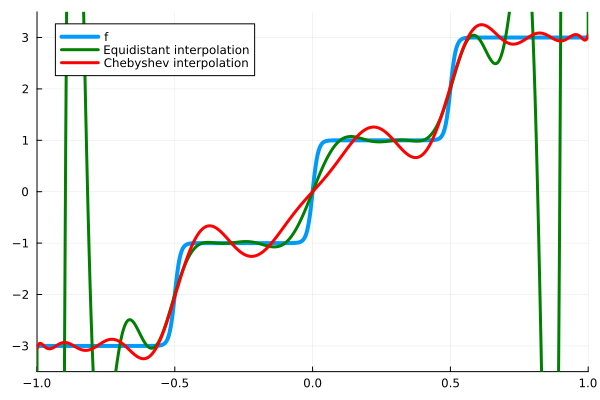

In [6]:
X = LinRange(-1, 1, 500)
plot(X, f.(X), linewidth=4, label="f")

### BEGIN SOLUTION
plot!(X, p_equi.(X), linewidth=3, color=:green, label="Equidistant interpolation")
plot!(X, p_cheb.(X), linewidth=3, color=:red, label="Chebyshev interpolation")
plot!(xlims = (-1, 1), ylims = (-3.5, 3.5))
### END SOLUTION

### <font color='green'>Numerical integration</font>

### <font color='orange'>[Exercise 2]</font> Implementing a composite integrator

Milne's integration rule reads
$$
    \int_{-1}^{1} u(x) \, dx \approx \frac{2}{3} \left( 2 u\left(-\frac{1}{2}\right) - u(0) + 2 u\left(\frac{1}{2}\right) \right)
$$

1. Write a function `composite_milne(u, a, b, N)`,
   which returns an approximation of the integral
   $$
       \int_{a}^{b} u(x) \, dx
   $$
   obtained by partitioning the integration interval $[a, b]$ into $N$ equally large cells,
   and applying Milne's rule within each cell.

In [15]:
function composite_milne(u, a, b, N)
    ### BEGIN SOLUTION
    Δ = (b - a) / N
    x₁ = a .+ Δ/4 .+ Δ*(0:N-1)
    x₂ = a .+ Δ/2 .+ Δ*(0:N-1)
    x₃ = a .+ 3Δ/4 .+ Δ*(0:N-1)
    2Δ/3 * u.(x₁) - Δ/3 * u.(x₂) + 2Δ/3 * u.(x₃) |> sum
    ### END SOLUTION
end

composite_milne (generic function with 1 method)

In [16]:
@assert (abs∘composite_milne)(x -> x, -1, 1, 10) < 1e-13
@assert composite_milne(x -> x, 1, 2, 10) ≈ 3/2
@assert composite_milne(x -> x^2, -1, 1, 1) ≈ 2/3
@assert composite_milne(x -> x^4, -1, 1, 1) ≈ 2/12

2. Take $u(x) = \cos(x)$, $a = -1$ and $b = 1$.
   Plot using `scatter` the evolution of the error,
   in absolute value, for the values of $N$ given,
   using a logarithmic scale for both axes.

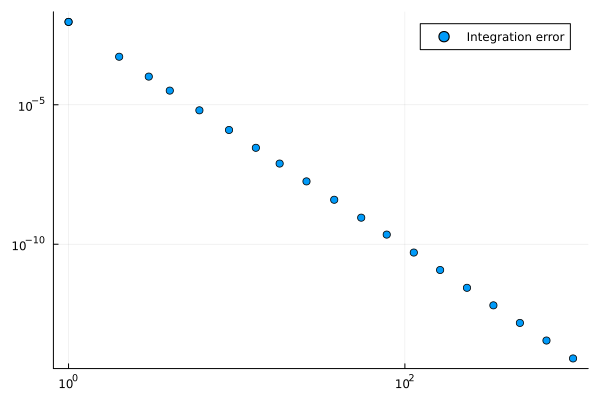

In [17]:
u(x) = cos(x)
a, b = -1 , 1

# Number of intervals
Ns = (round∘^).(10, LinRange(0, 3, 20))

# Exact value of the integral
I_exact = 2sin(1)

### BEGIN SOLUTION
Is = composite_milne.(u, a, b, Ns)
errors = abs.(Is .- I_exact)
scatter(Ns, errors, label="Integration error")
### END SOLUTION

# Set log scale for both axes
plot!(xscale=:log10, yscale=:log10)

3. Estimate the order of convergence with respect to $N$, i.e. find $\gamma$ such that
   $$
       \lvert \widehat{I}_{N} - I \rvert \propto \beta N^{-\gamma},
   $$
   where $I$ denotes the exact value of the integral and $\widehat{I}_{N}$ denotes its approbetamation.
   In order to find $\beta$ and $\gamma$, use the function `Polynomials.fit` to find a linear approximation of the form
   $$
       \log \lvert \widehat{I}_{N} - I \rvert \approx \log (\beta) - \gamma \log(N).
   $$
   If your calculation is correct, the function `N -> β*N^(-γ)`
   should give a good approximation of the integration error.

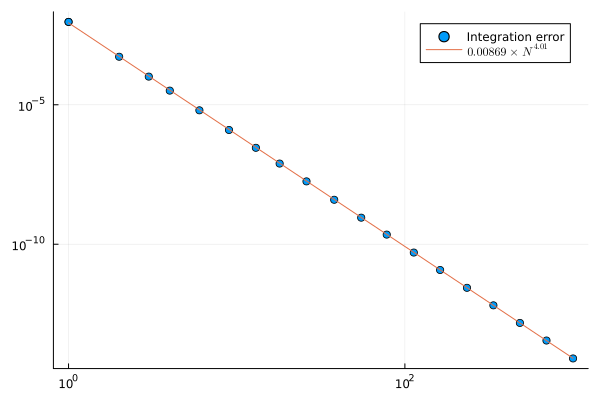

In [18]:
# Calculate β and γ
### BEGIN SOLUTION
p = fit(log.(Ns), log.(errors), 1)
β = round(exp(p[0]), sigdigits=3)
γ = -round(p[1], sigdigits=3)
### END SOLUTION
plot!(N -> β*N^(-γ), label=L"%$β \times N^{%$γ}")

In [19]:
@assert round(β, sigdigits=1) ≤ .1
@assert round(β, sigdigits=1) ≥ 1e-3
@assert round(γ, sigdigits=1) == 4

### <font color='orange'>[Exercise 3]</font> Gaussian integration

Our goal in this exercise is to write a program in order to calculate integrals of the form
$$
I[f] := \int_0^{\infty} f(x) \mathrm e^{-x} \, \mathrm d x
$$
To this end, we will use Laguerre polynomials,
which are orthogonal polynomials for the following inner product:
$$
 \langle f, g \rangle := \int_0^{\infty} f(x) g(x) \mathrm e^{-x} \, \mathrm d x
$$
These polynomials can be constructed by using the Gram-Schmidt algorithm.
1. Using that Laguerre polynomials satisfy the recurrence relation
   $$
       L_{k + 1}(x) = \frac{(2k + 1 - x)L_k(x) - k L_{k - 1}(x)}{k + 1}, \qquad L_0(x) = 1, \qquad L_1(x) = 1-x,
   $$
   we first write a function `laguerre(n)` which returns the Laguerre polynomial of degree $n$.

In [20]:
function laguerre(n)
    if n == 0
        return Polynomial([1])
    elseif n == 1
        return Polynomial([1, -1])
    else
        k = n-1
        x = Polynomial([0, 1])
        return ((2k + 1 - x) * laguerre(k) - k*laguerre(k-1))/(k+1)
    end
end

laguerre (generic function with 1 method)

2. Write a function `get_nodes_and_weights(n)` which returns the nodes and weights of the Gauss-Laguerre quadrature with $n$ nodes.
   <details>
       <summary>
           <em><font color='gray'>Hint (click to display)</font></em>
       </summary>

   - Recall that the nodes of the quadrature are the roots of the Laguerre polynomial of degree $n$.
     To find these, use the `roots` function from the `Polynomials` package.

     ```julia
         p = Polynomial([1, 0, -1])
         r = roots(p)  # r = [-1.0, 1.0]
     ```

   - Once you have found the nodes of the quadrature,
     the weights can be obtained from the relation
     $$
     \int_0^{\infty} q(x) \, \mathrm e^{-x} \, \mathrm d x
     = \sum_{i=1}^n w_i q(x_i),
     $$
     which should hold true for any polynomial $q$ of degree at most $2n - 1$.
     Taking $q = \ell_i$ to be the Lagrange polynomial associated with node $i$ immediately gives that
     $$
     w_i = \int_0^{\infty} \ell_i(x) \, \mathrm e^{-x} \, \mathrm d x,
     \qquad \ell_i = \prod_{\substack{j=1 \\ j \neq i}}^n \frac{x - x_j}{x_i - x_j}.
     $$

   - In order to construct Lagrange polynomials $\ell_i$,
     you may find it useful to use the `fromroots` function from the `Polynomials` package.

     ```julia
         r = [-1.0, 1.0]
         p = fromroots(r)  # p = Polynomial(-1.0 + 1.0*x^2)
     ```

     Recall also that, for a vector `x`,
     the expression `x[1:end .!= 5]` returns the vector obtained by removing the fifth element from `x`.

   - To calculate the integral of Lagrange polynomials against the exponential weight,
     recall that
     $$
     \int_0^{\infty} x^n \mathrm e^{-x} \, \mathrm dx = n!
     $$

In [21]:
function get_nodes_and_weights(n)
    ### BEGIN SOLUTION
    nodes = roots(laguerre(n))
    weights = zero(nodes)
    for i in 1:n
        ℓ = fromroots(nodes[1:end .!= i])
        ℓ /= ℓ(nodes[i])
        weights[i] = factorial.(0:n-1)'ℓ.coeffs
    end
    return nodes, weights
    ### END SOLUTION
end

get_nodes_and_weights (generic function with 1 method)

In [22]:
@assert get_nodes_and_weights(5) |> length == 2
@assert get_nodes_and_weights(5)[1] |> length == 5
@assert get_nodes_and_weights(5)[2] |> length == 5
@assert get_nodes_and_weights(1)[1] ≈ [1.0]
@assert get_nodes_and_weights(1)[2] ≈ [1.0]
@assert get_nodes_and_weights(3)[1] .|> laguerre(3) |> abs∘sum < 1e-10
@assert get_nodes_and_weights(5)[1] .|> laguerre(5) |> abs∘sum < 1e-10
@assert get_nodes_and_weights(5)[2] |> sum ≈ 1

3. Write a function `integrate_laguerre(f, n)`, which returns an approximation of $I[f]$ obtained by Gauss-Laguerre integration with $n$ nodes.

In [23]:
function integrate_laguerre(f, n)
    ### BEGIN SOLUTION
    nodes, weights = get_nodes_and_weights(n)
    return f.(nodes)'weights
    ### END SOLUTION
end

integrate_laguerre (generic function with 1 method)

In [24]:
@assert integrate_laguerre(x -> x, 5) ≈ 1
@assert integrate_laguerre(x -> x^2, 5) ≈ 2
@assert integrate_laguerre(x -> x^3, 5) ≈ 6
@assert integrate_laguerre(x -> exp(-x), 15) ≈ 1/2
@assert integrate_laguerre(x -> exp(-2x), 15) ≈ 1/3

4. Setting $n = 5$,
   we calculate numerically that the degree of exactness equals 9.

In [25]:
n = 5
for i in 1:9
    correct = integrate_laguerre(x -> x^i, n) ≈ factorial(i)
    println("f = x^$i, Rule exact? ", correct)
    @assert correct
end

f = x^1, Rule exact? true
f = x^2, Rule exact? true
f = x^3, Rule exact? true
f = x^4, Rule exact? true
f = x^5, Rule exact? true
f = x^6, Rule exact? true
f = x^7, Rule exact? true
f = x^8, Rule exact? true
f = x^9, Rule exact? true


5. Set $f(x) = \sin(x)$, and plot the integration error as a function of $n$,
   using appropriate scales for the `x` and `y` axes.

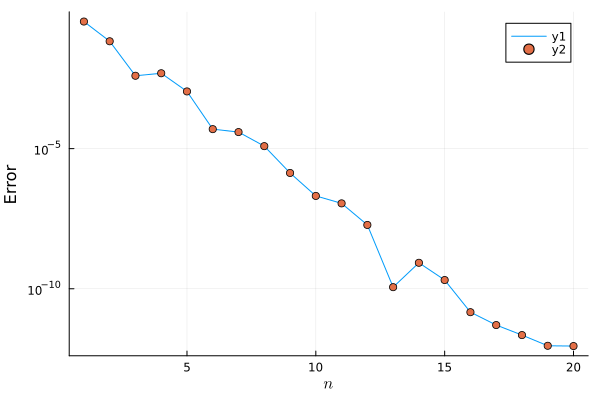

In [26]:
### BEGIN SOLUTION
ns = 1:20
f(x) = sin(x)
I_exact = 1/2
Ih = integrate_laguerre.(f, ns)
plot(ns, abs.(Ih .- I_exact), yscale=:log10, xlabel=L"n", ylabel="Error")
scatter!(ns, abs.(Ih .- I_exact))
### END SOLUTION

6. The aim of this exercise is to investigate an alternative manner of calculating the nodes and weights of the Gauss-Laguerre quadrature.

   - For the nodes, notice that the recursion given above for the Laguerre polynomials implies that
     $$
        \begin{pmatrix}
             x L_0(x) \\
             x L_1(x) \\
             x L_2(x) \\
             \vdots \\
             x L_{n-2}(x) \\
             x L_{n-1}(x)
         \end{pmatrix}
         =
         \underbrace{
         \begin{pmatrix}
             β_0 & α_1 \\
             α_1 & β_1 & α_2 \\
                      & α_2 & β_2 & α_3 \\
                      & & \ddots & \ddots & \ddots \\
                      & & & α_{n-2} & β_{n-2} & α_{n-1} \\
                      & & & & α_{n-1} & β_{n-1}
         \end{pmatrix}
         }_{\mathsf A}
         \underbrace{
         \begin{pmatrix}
             L_0(x) \\
             L_1(x) \\
             L_2(x) \\
             \vdots \\
             L_{n-2}(x) \\
             L_{n-1}(x)
         \end{pmatrix}
         }_{\mathbf{\boldsymbol{Φ}}(x)} +
         \begin{pmatrix}
             0 \\
             0 \\
             0 \\
             \vdots \\
             0 \\
             α_{n} L_{n}(x)
         \end{pmatrix}
        $$
        with $α_k = k$ and $β_k = 2k + 1$.
        Thus, the roots of $L_n$ are given by the eigenvalues of $\mathsf A$.
        This opens the door to another approach of calculating the integration nodes,
        by solving an eigenvalue problem.

   - Once you have calculated the nodes $x_1, \dotsc, x_n$ of the Gauss-Laguerre quadrature with $n$ nodes,
     i.e. the roots of $L_n$,
     the weights can be calculated using the following approach.
     First note that the Lagrange polynomial associated with $x_i$ may be written as
     $$
     \ell_{i}(x) = \frac{1}{L_n'(x_i)} \frac{L_n(x)}{x - x_i}.
     $$
     Now fix $i \in \{1,\dotsc,n\}$ and let $q(x) = L_n'(x) \ell_i(x)$.
     Then, since the Gauss-Laguerre quadrature with $n$ nodes should be exact for all polynomials of degree up to $2n-1$,
     it holds that
     $$
     \int_0^{\infty} q(x) \, \mathrm e^{-x} \, \mathrm d x
     = \sum_{i=1}^n w_i q(x_i).
     $$
     By definition of $q$, the right-hand side equals $w_i L_n'(x_i)$.
     On the other hand,
     by integration by parts, the left-hand side equals
     $$
     \begin{aligned}
     \int_0^{\infty} q(x) \, \mathrm e^{-x} \, \mathrm d x
     &= \int_0^{\infty} L_n'(x) \ell_i(x) \, \mathrm e^{-x} \, \mathrm d x \\
     &= (L_n \ell_i) \Big\vert^{\infty}_0 + \int_0^{\infty} \bigl( L_n(x) \ell_i(x) - L_n(x) \ell_i'(x)  \bigr)  \mathrm e^{-x} \, \mathrm d x.
     \end{aligned}
     $$
     Since $L_n(x)$ is $\mathrm L^2(\mathrm e^{-x})$ orthogonal to all polonymials of degree $n-1$ and less,
     the integral on the right-hand side is zero.
     Therefore, we have shown that
     $$
     w_i L_n'(x_i) = - L_n(0) \ell_i(0) = \frac{L_n(0)^2}{L_n'(x_i) x_i},
     $$
     where we used the expression of $\ell_i$ in the last equation.
     Rearranging the equation,
     we deduce that
     $$
     w_i = \frac{L_n(0)^2}{L_n'(x_i)^2 x_i}
     $$
     This relation enables to quickly calculate the weights once the nodes have been calculated.
     Note also that this relation remains true if we multiply $L_n$ by a constant factor.
     In other words, it holds that
     $$
     w_i = \frac{p_n(0)^2}{p_n'(x_i)^2 x_i}, \qquad p_n := (x - x_1) \dotsc (x - x_n).
     $$

   Use these approaches to calculate the nodes and weights of the Gauss-Laguerre quadrature
     <details>
         <summary>
             <em><font color='gray'>Hint (click to display)</font></em>
         </summary>

     - Use [`LinearAlgebra.SymTridiagonal`](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.SymTridiagonal) to construct the matrix `A`.

       ```julia
           S = SymTridiagonal([1, 2, 3], [4, 5])  # S = [1 4 0; 4 2 5; 0 5 3]
       ```

     - Les valeurs propres et vecteurs propres d'une matrice peuvent être calculées par [`LinearAlgebra.eigen`](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.eigen).

       ```julia
           E = eigen(S)
           λs = E.values  # eigenvalues from the smallest to the largest
           vs = E.vectors  # eigenvectors in columns
           λi = E.values[i]  # i-th eigenvalue
           vi = E.vectors[:, i]  # i-th eigenvector
       ```
       On notera d'une part que les valeurs propres sont triées par ordre croissant et sont renvoyées sous forme du vecteur `E.values` si `E` désigne le résultat de l'opérateur `LinearAlgebra.eigen`,
       et d'autre part que les vecteurs propres sont normalisés et sont les colonnes de la matrice renvoyée par `E.vectors`,
       si bien que le $i^\textrm{ème}$ vecteur propre est donné par `E.vectors[:, i]`.

     - Use `Polynomials.fromroots` and `Polynomials.derivative` to construct and differentiate the polynomial $p_n$.
     </details>

In [27]:
function get_nodes_and_weights_bis(n)
    ### BEGIN SOLUTION
    αs = Float64.(1:n-1)
    βs = Float64.(2(0:n-1) .+ 1)
    A = SymTridiagonal(βs, αs)
    nodes = eigen(A).values
    p = fromroots(nodes)
    dp = derivative(p)
    weights = (p(0)./dp.(nodes)).^2 ./ nodes
    return nodes, weights
    ### END SOLUTION
end

@show get_nodes_and_weights(5)[1]
@show get_nodes_and_weights_bis(5)[1]

(get_nodes_and_weights(5))[1] = [0.2635603197181409, 1.413403059106518, 3.5964257710407157, 7.085810005858862, 12.64080084427574]
(get_nodes_and_weights_bis(5))[1] = [0.2635603197181408, 1.413403059106515, 3.596425771040715, 7.08581000585883, 12.640800844275773]


5-element Vector{Float64}:
  0.2635603197181408
  1.413403059106515
  3.596425771040715
  7.08581000585883
 12.640800844275773

In [28]:
@assert get_nodes_and_weights_bis(5) |> length == 2
@assert get_nodes_and_weights_bis(5)[1] |> length == 5
@assert get_nodes_and_weights_bis(5)[2] |> length == 5
@assert get_nodes_and_weights_bis(1)[1] ≈ [1.0]
@assert get_nodes_and_weights_bis(1)[2] ≈ [1.0]
@assert get_nodes_and_weights_bis(3)[1] .|> laguerre(3) |> abs∘sum < 1e-10
@assert get_nodes_and_weights_bis(5)[1] .|> laguerre(5) |> abs∘sum < 1e-10
@assert get_nodes_and_weights_bis(5)[2] |> sum ≈ 1

### <font color='green'>Supplementary exercise (optional)</font>

### <font color='orange'>[Exercise 4]</font> Solving the Euler-Bernoulli beam equation by interpolation

The aim of this exercise to explore a practical application of polynomial interpolation.
More precisely, we will implement a numerical method to approximately solve the Euler-Bernoulli beam equation with homogeneous Dirichlet boundary conditions:

$$
  u\in C^4([0,1]),\quad\left\{\begin{aligned}  u''''(x) &= \varphi(x) \qquad \forall\, x\in(0,1),\\
  u(0) &= u'(0) = u'(1) = u(1) = 0, \end{aligned}\right.
$$
where $\varphi(x) = (2\pi)^4\cos(2\pi x)$ is a given transverse load applied to the beam.
In order to solve the equation numericaly, we approximate the right-hand side $\varphi$ by its interpolating polynomial $\widehat \varphi$, and then we solve the equation exactly with the right-hand side $\widehat \varphi$ instead of $\varphi$.

1. Let us first write a function `fit_values_and_slopes(u₀, up₀, u₁, up₁)` which returns the unique polynomial $p$ of degree 3 such that
   $$
   p(0) = u_0, \qquad p'(0) = up_0, \qquad p(1) = u_1, \qquad p'(1) = up_1.
   $$

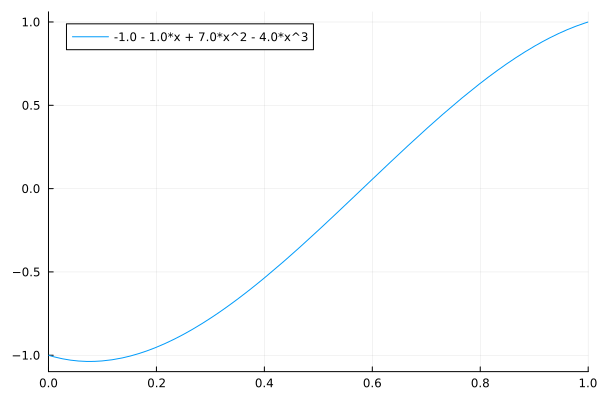

In [29]:
function fit_values_and_slopes(u₀, up₀, u₁, up₁)
    # We look for polynomials p(x) = a₀ + a₁ x + a₂ x² + a₃ x³
    A = [1 0 0 0; 0 1 0 0; 1 1 1 1; 0 1 2 3]
    α = A\[u₀; up₀; u₁; up₁]
    return Polynomial(α)
end

# Test our code
p = fit_values_and_slopes(-1, -1, 1, 1)
plot(p, xlims=(0, 1))

2. Write a function `approx(n)` implementing the approach described above for solving the PDE. The function should return a polynomial approximation of the solution based on an interpolation of **degree** $n$ of the right-hand side at equidistant points between 0 and 1, inclusive.

   <details>
       <summary>
           <em><font color='gray'>Hint (click to display)</font></em>
       </summary>

   - You can use the function `Polynomials.fit` library to obtain the interpolating polynomial:

       ```julia
           p = fit(x, y)
       ```

       where `x` are the interpolation nodes, and `y` are the values of the function to interpolate.

   - To calculate the exact solution with a polynomial right-hand side, notice that all solutions are polynomials, and without boundary conditions, the solution is unique modulo a cubic polynomial.

   - You can use the `integrate` function from the `Polynomials.jl` library, which calculates an antiderivative of a polynomial:

       ```julia
           P = integrate(p)
       ```

   - Use the `BigFloat` format to limit rounding errors.
       ```julia
           X = LinRange{BigFloat}(0, 1, n + 1)
       ```
   </details>

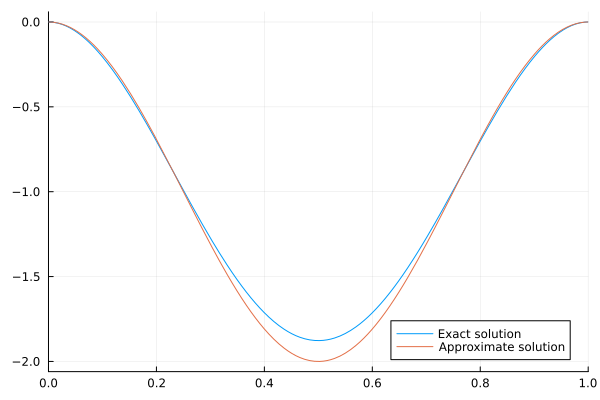

In [30]:
# Right-hand side
φ(x) = (2π)^4 * cospi(2*x)

# Exact solution (for comparison purposes)
u(x) = cospi(2*x) - 1

function approx(n)
    X = LinRange{BigFloat}(0, 1, n + 1)
    ### BEGIN SOLUTION
    Y = φ.(X)
    p = fit(X, Y)
    uh = integrate(integrate(integrate(integrate(p))))
    ∂uh = derivative(uh)
    uh -= fit_values_and_slopes(uh(0), ∂uh(0), uh(1), ∂uh(1))
    return uh
    ### END SOLUTION
end

plot(approx(3), xlims=(0, 1), label="Exact solution")
plot!(u, xlims=(0, 1), label="Approximate solution")

3. Write a function `estimate_error(n)` that approximates the error,
   in $L^\infty$ norm,
   between the exact and approximate solutions.
   Note that the exact solution is given by
   $$
      \varphi(x) = \cos(2\pi x) - 1.
   $$

In [31]:
function estimate_error(n)
    ### BEGIN SOLUTION
    un = approx(n)
    x_fine = LinRange(0, 1, 1000)
    un_fine, u_fine = un.(x_fine), u.(x_fine)
    return maximum(abs.(u_fine - un_fine))
    ### END SOLUTION
end

estimate_error (generic function with 1 method)

4. Plot the error for $n$ in the range $\{ 5, \dotsc, 50 \}$. Use a logarithmic scale for the $y$ axis.

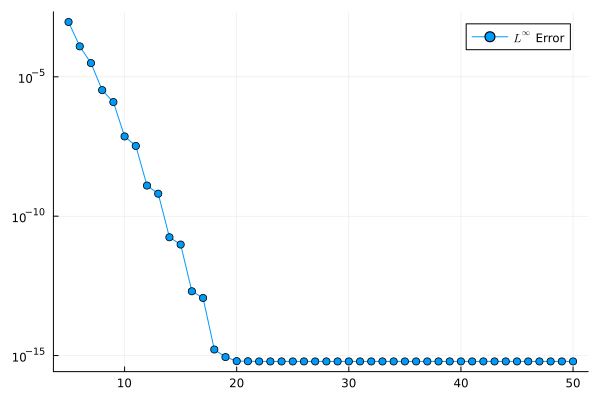

In [32]:
# ### BEGIN SOLUTION
ns = 5:50
errors = estimate_error.(ns)
plot(ns, errors, marker = :circle, label=L"$L^{\infty}$ Error")
plot!(yaxis=:log, lw=2)
# ### END SOLUTION